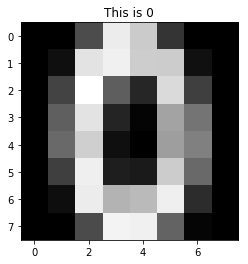

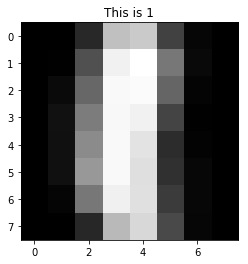

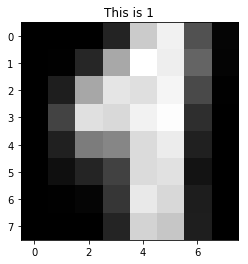

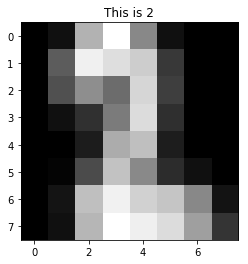

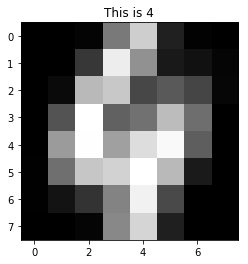

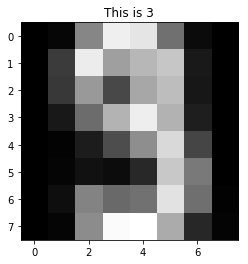

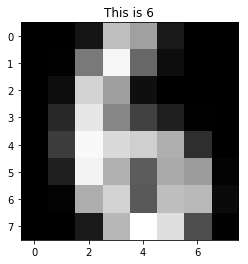

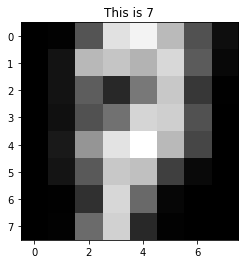

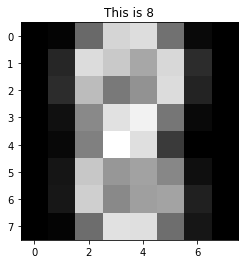

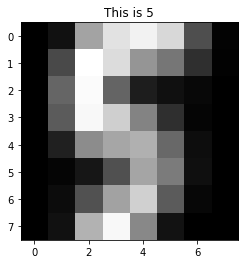

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
def k_means(k, data, centre , EPS):
	labels = get_labels(k ,data , centre)
	s = 0
	for i in range(k):
		mask = (labels-i) == 0
		if len(data[mask])>0:
			cen = sum(data[mask])/len(data[mask])
			s += np.linalg.norm(cen-centre[i])
			centre[i] = cen
	if (s>EPS):
		return k_means(k ,data ,centre ,EPS)
	else:
		return centre
def get_labels(k ,data , centre):
	dist = np.empty((len(data) , k))
	for i in range(len(data)):
		for l in range(k):
			dist[i][l] = np.linalg.norm(data[i] - centre[l])
	return np.array([np.argmin(dist[i]) for i in range(len(data))])
def dig_in_clust(k1, digits, labels):
	sr = np.empty(10)
	mask = labels-k1 == 0
	for i in range(10):
		mask1 = digits.target-i == 0
		mask2 = mask1&mask
		sr[i] = len(labels[mask2])
	return np.argmax(sr)
digits = load_digits()
digits.images.shape
centroids = digits.images[:10]
centroids = k_means(10,digits.images,centroids, 0.01)
for i in range(10):
	plt.imshow(centroids[i], cmap='gray')
	plt.title('This is {}'.format(dig_in_clust(i,digits,get_labels(10,digits.images, centroids))))
	plt.show()

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
def k_means(k, data, centre , EPS):
	labels = get_labels(k ,data , centre)
	s = 0
	for i in range(k):
		mask = (labels-i) == 0
		if len(data[mask])>0:
			cen = sum(data[mask])/len(data[mask])
			s += np.linalg.norm(cen-centre[i])
			centre[i] = cen
	if (s>EPS):
		return k_means(k ,data ,centre ,EPS)
	else:
		return centre
def get_labels(k ,data , centre):
	dist = np.empty((len(data) , k))
	for i in range(len(data)):
		for l in range(k):
			dist[i][l] = np.linalg.norm(data[i] - centre[l])
	return np.array([np.argmin(dist[i]) for i in range(len(data))])
def dig_in_clust(k1, digits, labels):
	sr = np.empty(10)
	mask = labels-k1 == 0
	for i in range(10):
		mask1 = digits.target-i == 0
		mask2 = mask1&mask
		sr[i] = len(labels[mask2])
	return np.argmax(sr)
def stab(k1, digits, labels, k):
	if k1!=-1:
		s = 0
		mask = labels - k1 ==0
		a = np.array(digits.target)[mask]
		for i in range(len(a)):
			if a[i]-dig_in_clust(k1, digits, labels) != 0:
				s+=1
		return s/len(a)
	else:
		s = 0
		for i in range(len(digits)):
			if digits.target[i]-dig_in_clust(labels[i],digits,labels) != 0:
				s+=1
		print(s/len(digits))
		return s/len(digits)
"""функция stab вычисляет количество ошибок
при к1 = -1 вычисляет для всех калстеров,
при к1 = номеру кластера - ошибки данного кластера"""
digits = load_digits()
digits.images.shape
centroids = digits.images[:10]
centroids = k_means(10,digits.images,centroids, 0.01)
print(stab(-1,digits, get_labels(10,digits.images, centroids), 10))

0.4
0.4


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
def k_means(k, data, centre , EPS):
	labels = get_labels(k ,data , centre)
	s = 0
	for i in range(k):
		mask = (labels-i) == 0
		if len(data[mask])>0:
			cen = sum(data[mask])/len(data[mask])
			s += np.linalg.norm(cen-centre[i])
			centre[i] = cen
	if (s>EPS):
		return k_means(k ,data ,centre ,EPS)
	else:
		return centre
def get_labels(k ,data , centre):
	dist = np.empty((len(data) , k))
	for i in range(len(data)):
		for l in range(k):
			dist[i][l] = np.linalg.norm(data[i] - centre[l])
	return np.array([np.argmin(dist[i]) for i in range(len(data))])
def dig_in_clust(k1, digits, labels):
	sr = np.empty(10)
	mask = labels-k1 == 0
	for i in range(10):
		mask1 = digits.target-i == 0
		mask2 = mask1&mask
		sr[i] = len(labels[mask2])
	return np.argmax(sr)
def aij(i,l,digits, labels, k):
	m1 = digits.target-i==0
	m2 = labels-l==0
	mask = m1&m2
	a = len(labels[mask])
	return a
digits = load_digits()
digits.images.shape
centroids = digits.images[:10]
centroids = k_means(10,digits.images,centroids, 0.01)
i = 0
while i<10:
	for l in range(10):
		print(aij(i,l,digits, get_labels(10,digits.images, centroids), 10), " ",end='')
	i+=1
	print(" ")
    """сделан вывод:сильно путаются цифры 3 5 9 6"""

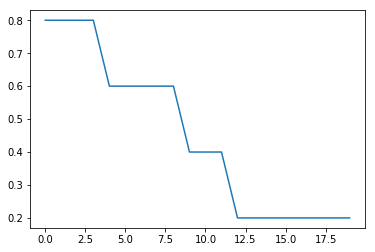

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
k = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
x = np.array(k)
y = np.array([0.8,0.8,0.8,0.8,0.6,0.6,0.6,0.6,0.6,0.4,0.4,0.4,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2])
X = np.linspace(-np.pi, np.pi, 1000, endpoint=True)
plt.plot(x, y, label="stab")
plt.show()
"""к = 13-14 - оптимальный вариант"""